In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
columns = ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 
           'he_core_radius', 'c_core_radius', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 
           'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'surf_avg_omega', 'surf_avg_v_rot', 
           'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 
           'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 
           'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 
           'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 
           'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 
           'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14', 
           'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'pp', 'cno', 'tri_alfa', 'burn_c', 
           'burn_n', 'burn_o', 'c12_c12', 'max_conv_vel_div_csound', 'max_gradT_div_grada', 
           'gradT_excess_alpha', 'min_Pgas_div_P', 'max_L_rad_div_Ledd', 'e_thermal', 'moment_of_inertia', 
           'mass_conv_envelope', 'rad_conv_envelope', 'envelope_binding_energy', 'dynamic_timescale', 
           'kh_timescale', 'mdot_timescale']
outputcolumns = ['star_age', 'star_mass', 'log_L', 'log_R', 'he_core_mass', 'c_core_mass', 'log_Teff', 
                 'envelope_binding_energy', 'he_core_radius', 'c_core_radius', 'mass_conv_envelope', 
                 'rad_conv_envelope', 'age_old', 'phase']

In [3]:
outputfname = '00526M.track.eep'
fname = 'Hydrogen/005260_history.data.eep'

In [4]:
dat = np.genfromtxt(fname, skip_header=12)
dat = pd.DataFrame(dat, columns=columns)
print(dat.columns)
print(len(dat.columns))

outputdat = np.genfromtxt(outputfname, skip_header=211)
outputdat = pd.DataFrame(outputdat, columns=outputcolumns)
print(outputdat.columns)
print(len(outputdat.columns))

Index(['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass',
       'o_core_mass', 'he_core_radius', 'c_core_radius', 'log_L',
       'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff',
       'log_abs_Lgrav', 'log_R', 'log_g', 'surf_avg_omega', 'surf_avg_v_rot',
       'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_Lrad_div_Ledd',
       'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4',
       'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12',
       'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19',
       'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28',
       'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56',
       'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega',
       'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4',
       'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24',
       'center_si28', 'pp', 'cno', 'tri_alfa', 'burn_c', 'bu

202    -49.498296
203    -49.498227
204    -49.498158
205    -49.498089
206    -49.498020
          ...    
1404    45.352196
1405    45.326582
1406    45.299927
1407    45.272527
1408    45.245377
Name: envelope_binding_energy, Length: 1207, dtype: float64
0      -49.498296
1      -49.498227
2      -49.498158
3      -49.498089
4      -49.498020
          ...    
1202    45.352196
1203    45.326582
1204    45.299927
1205    45.272527
1206    45.245377
Name: envelope_binding_energy, Length: 1207, dtype: float64


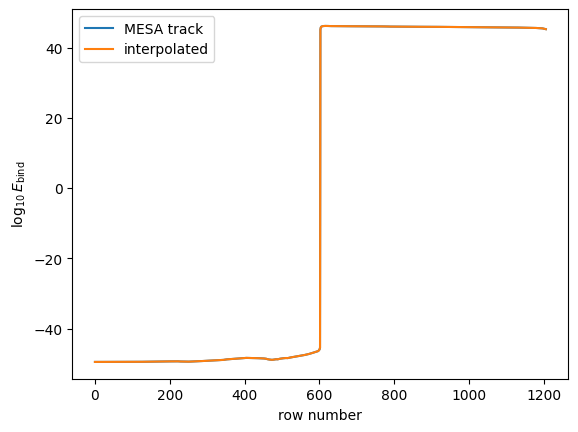

In [5]:
track = np.sign(dat['envelope_binding_energy']) * np.log10(np.absolute(dat['envelope_binding_energy']))
print(track.loc[202:])
print(outputdat['envelope_binding_energy'])
plt.plot(track.loc[202:].reset_index(drop=True), label = "MESA track")
plt.plot(outputdat['envelope_binding_energy'], label = "interpolated")
plt.xlabel("row number")
plt.ylabel(r"$\log_{10} E_{\mathrm{bind}}$")
plt.legend()
plt.show()